In [65]:
from manifold_learning import IMD
from FastCCM import CCM
import matplotlib.pyplot as plt
import numpy as np
from manifold_learning.utils import utils
from manifold_learning.data.data_loader import get_truncated_lorenz_rand
from sklearn.preprocessing import StandardScaler
import importlib

In [66]:
def gaussian_kernel(x, y, sigma=1.0):
    return np.exp(-np.linalg.norm(x - y,axis=1)**2 / (2 * sigma**2))

In [67]:
exp_kernel_grid = np.array(np.meshgrid(np.linspace(-20,20,8), 
                                       np.linspace(1,50,8))).reshape(2,-1).T

In [68]:
X_ = [get_truncated_lorenz_rand(800,n_steps=40000)[:,[0,2]] for i in range(5)]
observables = np.concatenate([np.array([gaussian_kernel(x,e,sigma=15) for e in exp_kernel_grid]) for x in X_]).T


In [69]:
observables = StandardScaler().fit_transform(observables)

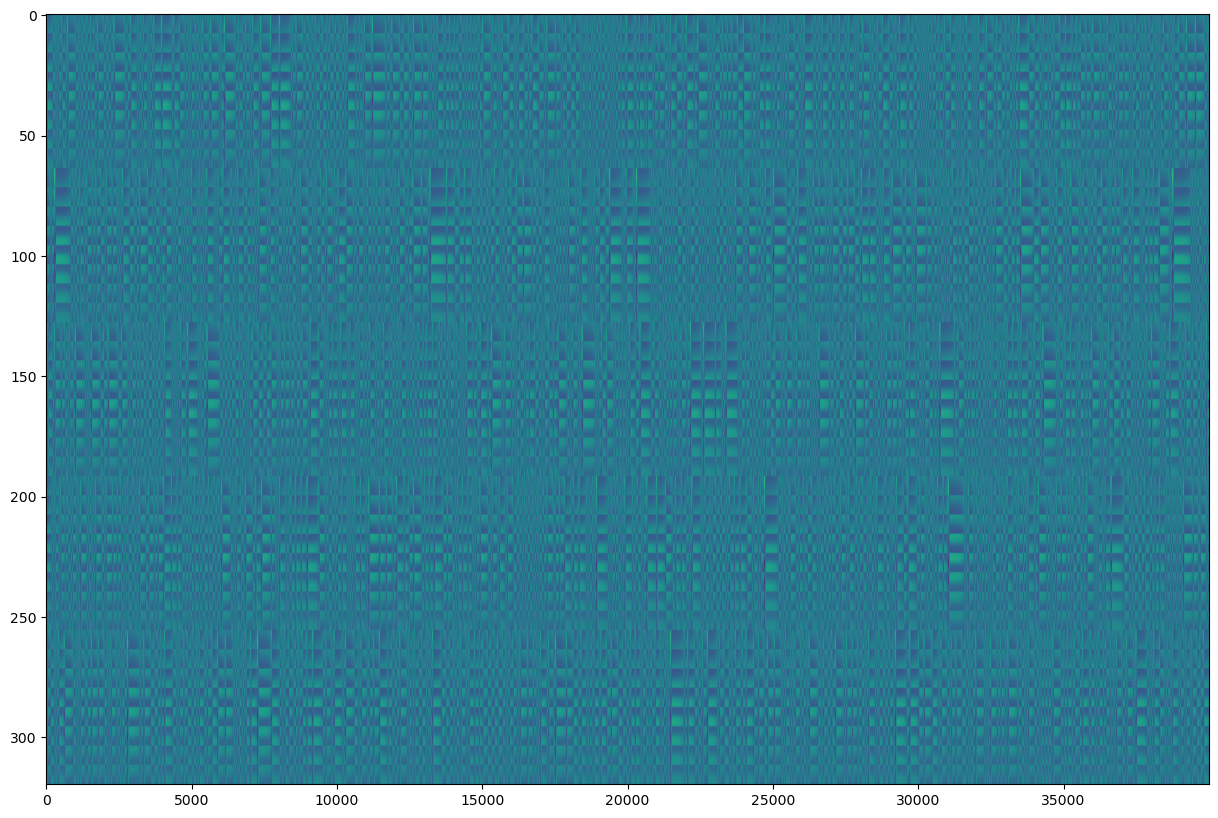

In [70]:
plt.figure(figsize=(15,10))
plt.imshow(observables.T,aspect="auto")

In [71]:
trainer = IMD.IMD_1D(observables.shape[1],n_components=10,subtract_corr=True, device="cuda")


In [72]:

trainer.fit(observables, embed_dim=3, embed_lag=5, sample_len=400, library_len=1200, 
            exclusion_rad=20, nbrs_num=30, tp=20, 
            epochs=2000, num_batches=32,optimizer="Adagrad", learning_rate=0.002,tp_policy="fixed")

Epoch 1/2000, Loss: 1.1262
Epoch 2/2000, Loss: 1.0746
Epoch 3/2000, Loss: 1.0570
Epoch 4/2000, Loss: 1.0495
Epoch 5/2000, Loss: 1.0393
Epoch 6/2000, Loss: 1.0349
Epoch 7/2000, Loss: 1.0252
Epoch 8/2000, Loss: 1.0197
Epoch 9/2000, Loss: 1.0076
Epoch 10/2000, Loss: 1.0004
Epoch 11/2000, Loss: 0.9939
Epoch 12/2000, Loss: 0.9844
Epoch 13/2000, Loss: 0.9769
Epoch 14/2000, Loss: 0.9716
Epoch 15/2000, Loss: 0.9618
Epoch 16/2000, Loss: 0.9550
Epoch 17/2000, Loss: 0.9486
Epoch 18/2000, Loss: 0.9411
Epoch 19/2000, Loss: 0.9296
Epoch 20/2000, Loss: 0.9213
Epoch 21/2000, Loss: 0.9152
Epoch 22/2000, Loss: 0.9082
Epoch 23/2000, Loss: 0.9074
Epoch 24/2000, Loss: 0.9020
Epoch 25/2000, Loss: 0.9023
Epoch 26/2000, Loss: 0.8956
Epoch 27/2000, Loss: 0.8887
Epoch 28/2000, Loss: 0.8867
Epoch 29/2000, Loss: 0.8793
Epoch 30/2000, Loss: 0.8788
Epoch 31/2000, Loss: 0.8720
Epoch 32/2000, Loss: 0.8662
Epoch 33/2000, Loss: 0.8615
Epoch 34/2000, Loss: 0.8494
Epoch 35/2000, Loss: 0.8419
Epoch 36/2000, Loss: 0.8318
E

KeyboardInterrupt: 

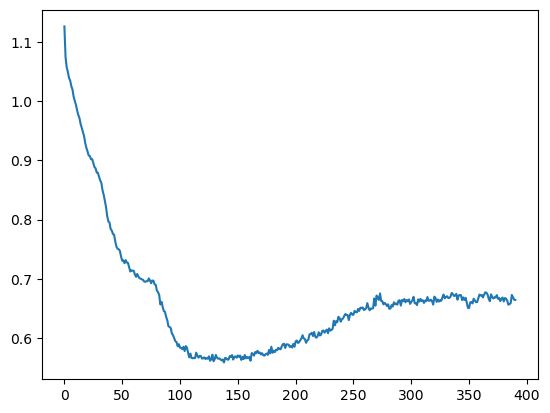

In [73]:
plt.plot(trainer.get_loss_history()[:])


In [74]:

unmixed = trainer.predict(observables)

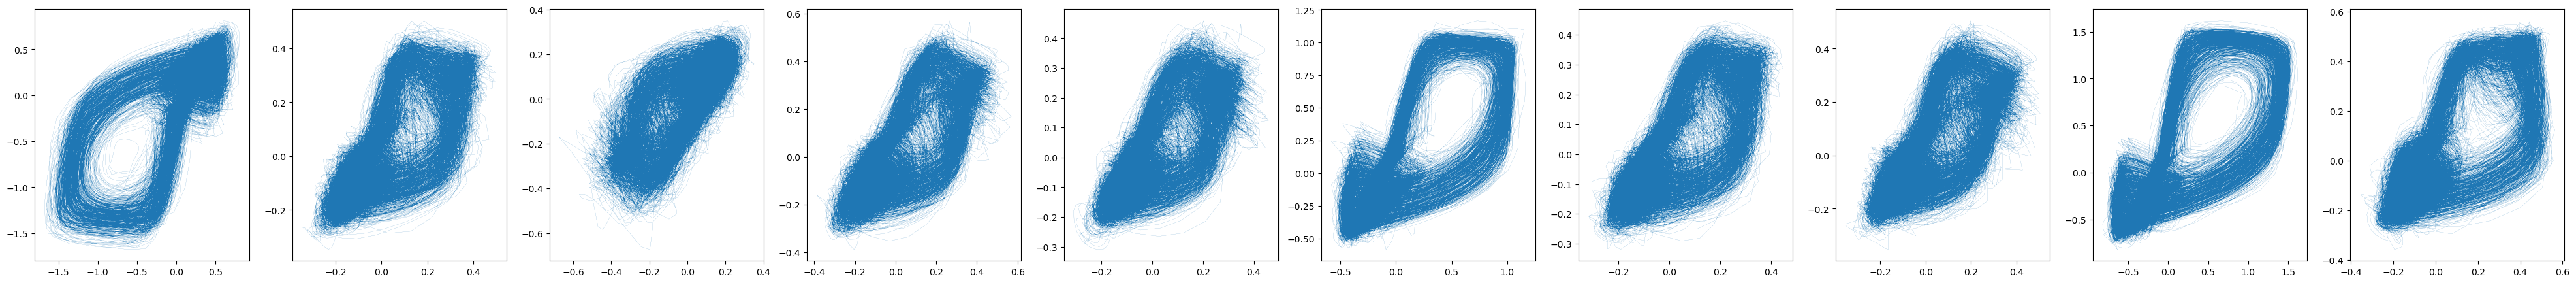

In [75]:
plt.figure(figsize=(5*unmixed.shape[1],5))
for i in range(unmixed.shape[1]):
    plt.subplot(1,unmixed.shape[1],i+1)
    plt.plot(unmixed[:-5,i],unmixed[5:,i],linewidth=0.1)

In [76]:
unmixed_td = utils.get_td_embedding_np(unmixed[:,:,0],3,5)

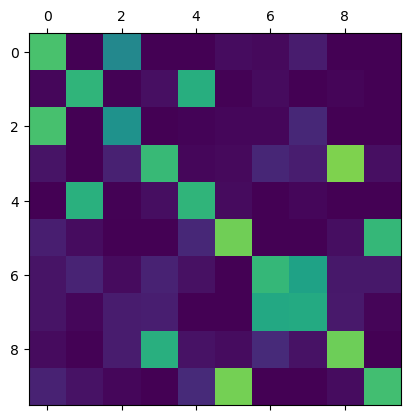

In [77]:
plt.matshow(CCM.PairwiseCCM().compute(np.transpose(unmixed_td,axes=(2,0,1)),np.transpose(unmixed_td,axes=(2,0,1)),1500,400,60,30,30).mean(axis=0),vmin=0,vmax=1)
